
# Definiáljunk egy G gráfot

Ez a gráf egy dictionary, aminek a kulcsai a gráf csúcsai és az értékei listák, amik a csúcsból kimenő éleket és azok súlyait tartalmazzák egy-egy tupple-ben.

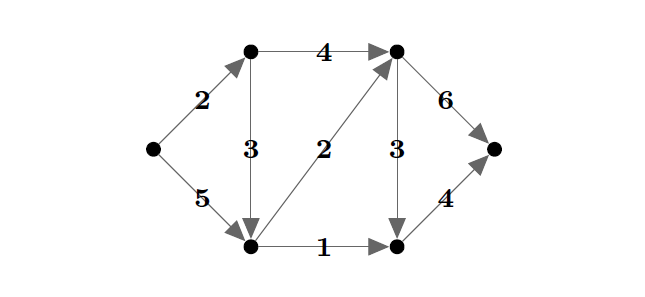

In [44]:
G = {
    0:[(1,2),(5,5)],
    1:[(2,4),(5,3)],
    2:[(3,6),(4,3)],
    3:[],
    4:[(3,4)],
    5:[(2,2),(4,1)]
}

A 2-es csúcsból megy egy él a 3-ba, ennek súlya 6, és megy egy él a 4-be, aminek a súlya 3.

In [12]:
G[2]

[(3, 6), (4, 3)]

Definiáljunk egy függvényt, ami ha megkapja a gráfot és egy csúcsát, akkor egy listában kiadja annak szomszédait.

In [14]:
def get_neighbours(Graph, node):
    list_of_neighbours = [i[_] for i in Graph[_]]
    
    return list_of_neighbours

In [106]:
assert get_neighbours(G, 2) == [3, 4]


In [104]:
assert get_neighbours(G, 3) == []

True

Definiáljunk egy függvényt, ami törli a start_node-ból az end_node-ba mutató élt, azaz eltávolítja a start_node szomszédainak listájából az end_node tupple-jét

In [24]:
def delete_edge(Graph, start_node, end_node):
    for i in Graph[_]:
        if i[_]==end_node:
            Graph[_].remove(i)

    

In [ ]:
#ezt csak óvatosan, mert ha egyszer törlünk vele, akkor újra kell definiálni a H gráfot

In [110]:
H = {
    0:[(1,2),(5,5)],
    1:[(2,4),(5,3)],
    2:[(3,6),(4,3)],
    3:[],
    4:[(3,4)],
    5:[(2,2),(4,1)]
}

In [112]:
delete_edge(H,2,3)

In [114]:
assert H == {0: [(1, 2), (5, 5)],
 1: [(2, 4), (5, 3)],
 2: [(4, 3)],
 3: [],
 4: [(3, 4)],
 5: [(2, 2), (4, 1)]}

True

Definiáljunk egy függvényt, ami eldönti, hogy van-e bejövő éle egy csúcsnak, azaz legyen True a visszatérési értéke ha van bejövő él és False, ha nincs.

In [38]:
def check_incoming_edge(Graph, node):
    has_incoming_edge = False
    
    for _ in Graph.keys():
        for i in get_neighbours(Graph, _):
            if i == _:
                has_incoming_edge = True
                
    return has_incoming_edge

In [102]:
assert check_incoming_edge(G, 1)  == True

True

In [103]:
assert check_incoming_edge(G, 0)  == False

True

Definiáljunk egy függvényt, ami kiválaszt egy kezdőcsúcsot a topologikus rendezéshez, azaz egy olyan csúcsot, aminek nincs bejövő éle.

In [ ]:
def get_starting_node(Graph):
    i = 0
    nodes = list(Graph.keys())
    
    while check_incoming_edge(Graph, nodes[_]) != False:
        i = i+1
    return nodes[_]
        

In [91]:
get_starting_node(G) == 0

0

L ← Üres lista, amely tartalmazni fogja a rendezett elemeket
S ← Az összes csúcs halmaza bejövő él nélkül

amíg az S nem üres
  távolítson el egy n csúcsot S-ből
  szúrja be n-t az L végére
  ciklus m csúcs egy e éllel n-től m-ig
    távolítsa el az e élet a gráfból
    ha m-nek nincs más bejövő éle, akkor
      illessze be m-t az S-be

ha a gráfnak vannak élei, akkor
  visszatér hiba (a gráfnak legalább egy köre van)
különben
  visszatér L (topológiailag rendezett sorrend) 

In [89]:
def get_topologycal_order(Graph):
    L = []
    S = [get_starting_node(Graph)]

    while len(S) != 0:
        n = S[0]
        S.remove(_)
        L.append(_)
        for m in get_neighbours(Graph, n):
            delete_edge(_, _, _)
            if check_incoming_edge(Graph, m) == _:
                S.append(_)
    return L

In [108]:
G = {
    0:[(1,2),(5,5)],
    1:[(2,4),(5,3)],
    2:[(3,6),(4,3)],
    3:[],
    4:[(3,4)],
    5:[(2,2),(4,1)]
}

In [109]:
assert get_topologycal_order(G) == [0, 1, 5, 2, 4, 3]